In [1]:
##################### MOUNT YOUT GOOGLE DRIVE AS A FOLDER ######################
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [10]:
import os
import numpy as np
import skimage.io as io
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import *
from keras.utils import *
from keras.optimizers import Adam
from keras.models import *
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Hindi Handwritten Character Dataset')
os.listdir()

['Y_test.csv',
 'Y_train.csv',
 'X_test.csv',
 'Y_test.gsheet',
 'X_train.csv',
 'References.npy']

In [0]:
X_train = pd.read_csv('X_train.csv')
X_train = X_train.drop(X_train.columns[0], axis = 1)
X_train = np.array(X_train)

In [0]:
Y_train = pd.read_csv('Y_train.csv')
Y_train = Y_train.drop(Y_train.columns[0], axis = 1)
Y_train = np.array(Y_train)

In [0]:
X_test = pd.read_csv('X_test.csv')
X_test = X_test.drop(X_test.columns[0], axis = 1)
X_test = np.array(X_test)

In [0]:
Y_test = pd.read_csv('Y_test.csv')
Y_test = Y_test.drop(Y_test.columns[0], axis = 1)
Y_test = np.array(Y_test)

In [8]:
X_train = X_train.reshape((78200,32,32,1))
print(X_train.shape)
Y_train = Y_train.reshape((78200,1))
print(Y_train.shape)
X_test = X_test.reshape((13800,32,32,1))
print(X_test.shape)
Y_test = Y_test.reshape((13800,1))
print(Y_test.shape)

(78200, 32, 32, 1)
(78200, 1)
(13800, 32, 32, 1)
(13800, 1)


In [9]:
ref = np.load('References.npy').item()
print(ref)

{1: 'ka', 2: 'kha', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha', 10: 'yna', 11: 'taamatar', 12: 'thaa', 13: 'daa', 14: 'dhaa', 15: 'adna', 16: 'tabala', 17: 'tha', 18: 'da', 19: 'dha', 20: 'na', 21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'waw', 30: 'motosaw', 31: 'petchiryakha', 32: 'patalosaw', 33: 'ha', 34: 'chhya', 35: 'tra', 36: 'gya', 37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9}


In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2)
X_test, Y_test = shuffle(X_test, Y_test, random_state = 0)

patalosaw


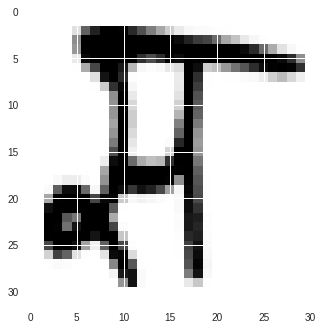

In [60]:
plt.imshow(X_test[0])
print(ref[int(Y_test[0])])

In [12]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.6, random_state = 1)
print(X_test.shape)
print(X_val.shape)

(5520, 32, 32, 1)
(8280, 32, 32, 1)


In [13]:
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(5520, 47)


In [14]:
Y_val = to_categorical(Y_val)
print(Y_val.shape)

(8280, 47)


In [15]:
Y_train = to_categorical(Y_train)
print(Y_train.shape)

(78200, 47)


In [13]:
inputs = Input(shape = (32,32,1))
conv1 = Conv2D(64, 3, padding='same', activation='relu')(inputs)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(conv1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(128, 3, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 5, padding='same', activation='relu')(conv3)
pool4 = MaxPooling2D((2,2))(conv4)
conv5 = Conv2D(256, 5, padding='same', activation='relu')(pool4)
flat = Flatten()(conv5)
dense0 = Dense(512, activation='relu')(flat)
dense1 = Dense(128, activation='relu')(dense0)
dense2 = Dense(47, activation='softmax')(dense1)

model = Model(input = inputs, output = dense2)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 256)       819456    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 256)         0         
__________

/home/vatsalya/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [22]:
model.compile(Adam(lr = 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 400, validation_data = (X_val, Y_val), verbose = 1)

Train on 78200 samples, validate on 8280 samples
Epoch 1/20
78200/78200 [==============================] - 67s 854us/step - loss: 0.6263 - acc: 0.8285 - val_loss: 0.1106 - val_acc: 0.9667
Epoch 2/20
78200/78200 [==============================] - 59s 758us/step - loss: 0.0717 - acc: 0.9782 - val_loss: 0.0830 - val_acc: 0.9744
Epoch 3/20
78200/78200 [==============================] - 59s 755us/step - loss: 0.0360 - acc: 0.9886 - val_loss: 0.0639 - val_acc: 0.9806
Epoch 4/20
78200/78200 [==============================] - 59s 754us/step - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0741 - val_acc: 0.9801
Epoch 5/20
78200/78200 [==============================] - 59s 753us/step - loss: 0.0205 - acc: 0.9937 - val_loss: 0.0579 - val_acc: 0.9838
Epoch 6/20
78200/78200 [==============================] - 59s 751us/step - loss: 0.0149 - acc: 0.9953 - val_loss: 0.0837 - val_acc: 0.9766
Epoch 7/20
78200/78200 [==============================] - 59s 750us/step - loss: 0.0126 - acc: 0.9960 - val_loss: 0.1

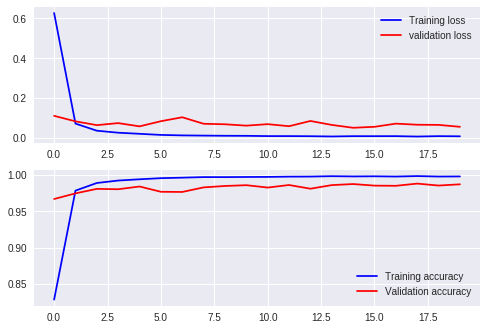

In [23]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
model.save('First model.h5')

In [33]:
model.evaluate(X_test, Y_test, batch_size = 400, verbose =1)

5520/5520 [==============================] - 2s 279us/step


[0.05953908379635085, 0.9882246471833491]

In [34]:
model.metrics_names

['loss', 'acc']

In [46]:
predicted = model.predict(x = X_test, verbose = 1)

5520/5520 [==============================] - 2s 423us/step


6


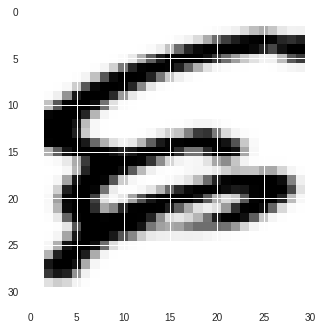

In [48]:
index = 500
img = X_test[index]
img = img.reshape((32,32))
plt.imshow(img)
predicted = np.argmax(predicted, axis = 1)
print(ref[predicted[index]])

In [63]:
inputs = Input(shape = (32,32,1))
conv0 = Conv2D(64, 3, padding = 'same', activation = 'relu')(inputs)
conv1 = Conv2D(64, 3, padding='same', activation='relu')(conv0)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(conv1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(128, 3, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 5, padding='same', activation='relu')(conv3)
pool4 = MaxPooling2D((2,2))(conv4)
conv5 = Conv2D(256, 5, padding='same', activation='relu')(pool4)
flat = Flatten()(conv5)
dense0 = Dense(512, activation='relu')(flat)
dense1 = Dense(128, activation='relu')(dense0)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(47, activation='softmax')(dense2)

model1 = Model(input = inputs, output = dense3)
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 256)       819456    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *

In [0]:
datagen = ImageDataGenerator(rotation_range = 10, zoom_range = 0.1, width_shift_range = 0.1, height_shift_range = 0.1)
datagen.fit(X_train)

In [0]:
model1.compile(Adam(lr = 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=3)

In [69]:
history = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 200), epochs = 25, steps_per_epoch = 391, validation_data = (X_val, Y_val), callbacks = [reduce_lr])

Epoch 1/25
391/391 [==============================] - 76s 194ms/step - loss: 0.0835 - acc: 0.9749 - val_loss: 0.0469 - val_acc: 0.9854
Epoch 2/25
391/391 [==============================] - 75s 192ms/step - loss: 0.0612 - acc: 0.9817 - val_loss: 0.0580 - val_acc: 0.9849
Epoch 3/25
391/391 [==============================] - 75s 192ms/step - loss: 0.0550 - acc: 0.9838 - val_loss: 0.0505 - val_acc: 0.9868
Epoch 4/25
391/391 [==============================] - 75s 192ms/step - loss: 0.0485 - acc: 0.9853 - val_loss: 0.0378 - val_acc: 0.9899
Epoch 5/25
391/391 [==============================] - 75s 193ms/step - loss: 0.0445 - acc: 0.9864 - val_loss: 0.0429 - val_acc: 0.9893
Epoch 6/25
391/391 [==============================] - 75s 192ms/step - loss: 0.0385 - acc: 0.9884 - val_loss: 0.0298 - val_acc: 0.9917
Epoch 7/25
391/391 [==============================] - 75s 192ms/step - loss: 0.0353 - acc: 0.9899 - val_loss: 0.0364 - val_acc: 0.9913
Epoch 8/25
391/391 [==============================] - 7

In [0]:
model1.save('Second model.h5')

In [71]:
model1.evaluate(X_test, Y_test, batch_size = 400, verbose =1)

5520/5520 [==============================] - 2s 366us/step


[0.024226388681015214, 0.9943840633267942]

In [72]:
model1.metrics_names

['loss', 'acc']